In [1]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [22]:
import numpy as np
import pandas as pd
df = pd.read_csv(R"C:\Users\ACER\Downloads\train.csv", usecols=('Age','Fare','Survived'))
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [25]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [26]:
df.sample(10)

,Survived,Age,Fare
397,0,46.000000,26.0000
370,1,25.000000,55.4417
237,1,8.000000,26.2500
217,0,42.000000,27.0000
459,0,29.699118,7.7500
171,0,4.000000,29.1250
551,0,27.000000,26.0000
419,0,10.000000,24.1500
111,0,14.500000,14.4542
90,0,29.000000,8.0500


In [31]:
X=df.iloc[:,1:3]
y = df.iloc[:,0]


In [32]:
X_train,X_test, y_train, y_test = train_test_split(df.iloc[:,1:3], df.iloc[:,0],test_size= .2, random_state=42)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10964\2877210164.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


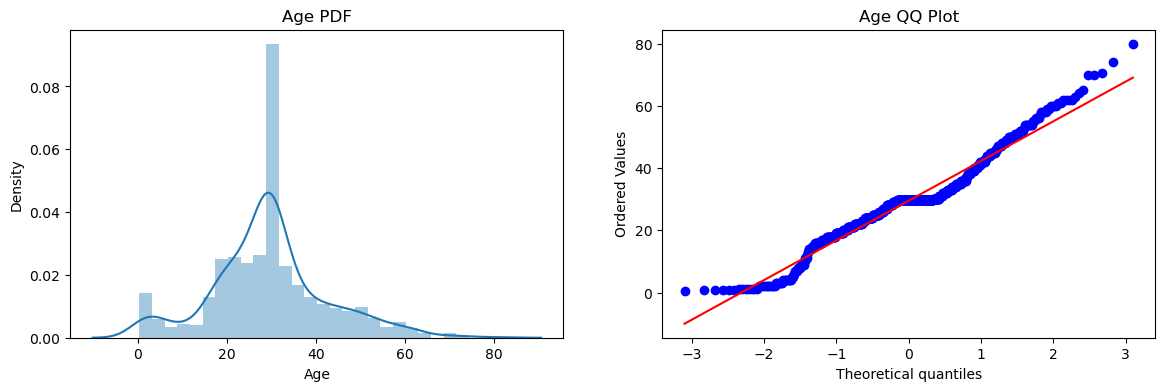

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_10964\474975069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


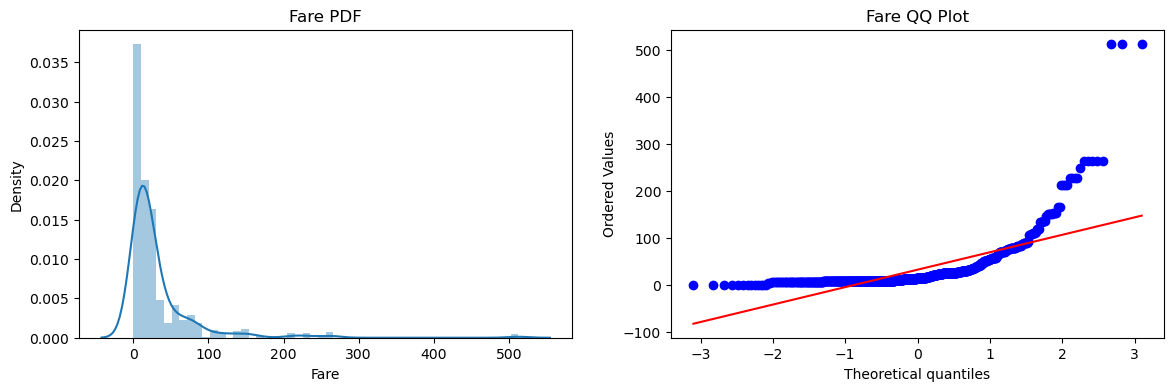

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [35]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [36]:
X_train_transformed

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


C:\Users\ACER\AppData\Local\Temp\ipykernel_10964\1796258835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare'])


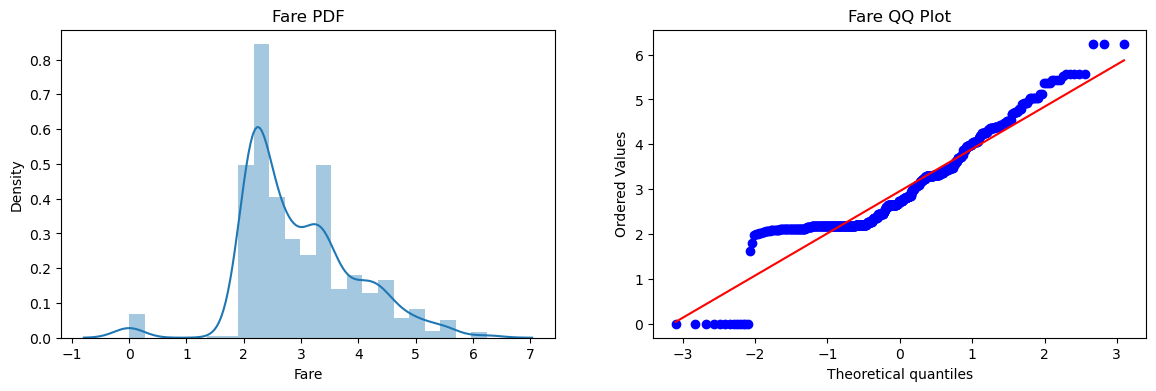

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10964\1158860979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age'])


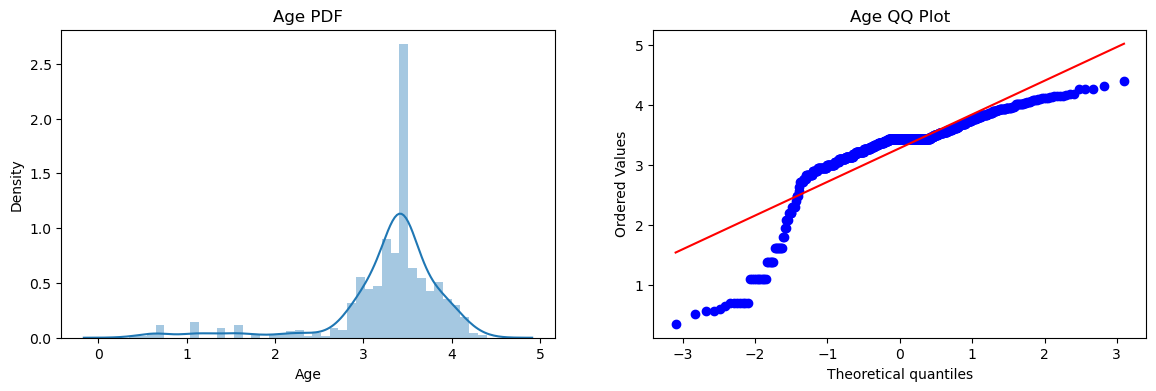

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [40]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [41]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6532334581772785
